In [1]:
import numpy as np
import random
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams["font.family"]="Malgun Gothic"
plt.rcParams["axes.unicode_minus"]=False

In [3]:
IMG_SIZE=86
BATCH_SIZE=16
SEED=42
DATA_PATH="../../data/processed/02_kaggle_dataset/train"

datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.7, 1.3],
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    directory=DATA_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training",
    shuffle=True,
    seed=SEED
)

val_generator = datagen.flow_from_directory(
    directory=DATA_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation",
    shuffle=False
)

Found 38400 images belonging to 2 classes.
Found 9600 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))

model.add(Conv2D(96, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.00027600388247395235),
            loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\dear1\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
esc=EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history=model.fit(train_generator, validation_data=val_generator,
                epochs=20, callbacks=[esc], verbose=1)

Epoch 1/20


C:\Users\dear1\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2400/2400 ━━━━━━━━━━━━━━━━━━━━ 174s 71ms/step - accuracy: 0.8573 - loss: 0.5534 - val_accuracy: 0.8860 - val_loss: 0.2882
Epoch 2/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 171s 71ms/step - accuracy: 0.9527 - loss: 0.1271 - val_accuracy: 0.8078 - val_loss: 0.4553
Epoch 3/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 192s 80ms/step - accuracy: 0.9734 - loss: 0.0838 - val_accuracy: 0.8484 - val_loss: 0.3832
Epoch 4/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 185s 77ms/step - accuracy: 0.9782 - loss: 0.0664 - val_accuracy: 0.9211 - val_loss: 0.2589
Epoch 5/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 185s 77ms/step - accuracy: 0.9788 - loss: 0.0657 - val_accuracy: 0.8592 - val_loss: 0.6009
Epoch 6/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 184s 77ms/step - accuracy: 0.9829 - loss: 0.0552 - val_accuracy: 0.9292 - val_loss: 0.2397
Epoch 7/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 186s 77ms/step - accuracy: 0.9845 - loss: 0.0524 - val_accuracy: 0.7778 - val_loss: 0.6359
Epoch 8/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 192s 80ms/step - accuracy: 0.9853 - lo

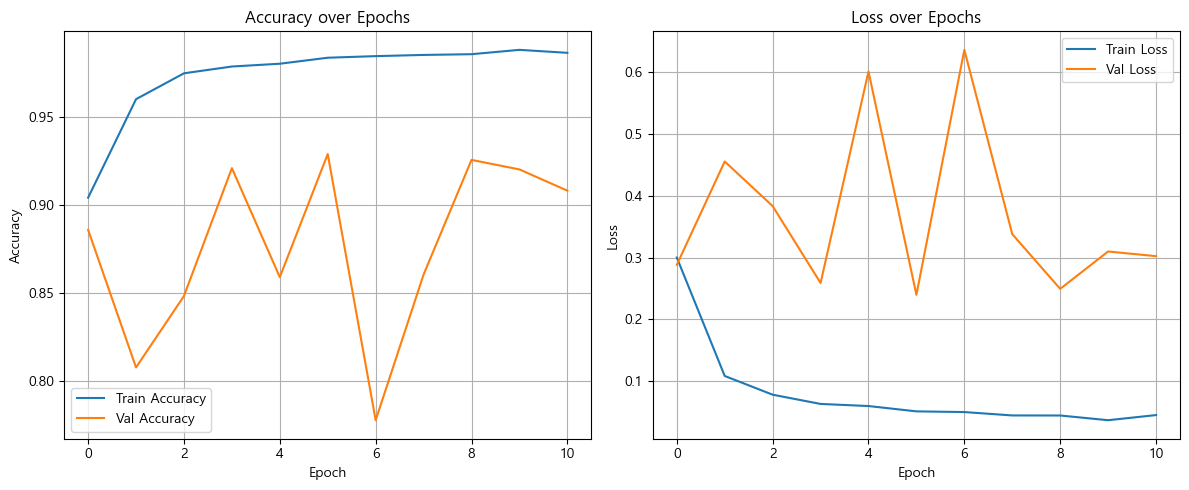

In [9]:
plt.figure(figsize=(12, 5))

# ACC
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("../../results/images/training_plot.png")
plt.show()

In [11]:
from sklearn.metrics import classification_report

y_true=val_generator.classes
steps=val_generator.samples // val_generator.batch_size + 1
y_pred_prob=model.predict(val_generator, steps=steps, verbose=0)
y_pred=(y_pred_prob > 0.5).astype(int)

report=classification_report(y_true, y_pred, target_names=["closed", "open"])
print(report)

with open("../../results/reports/classification_report.txt", "w") as f:
    f.write(report)

              precision    recall  f1-score   support

      closed       0.88      0.99      0.93      4800
        open       0.99      0.87      0.92      4800

    accuracy                           0.93      9600
   macro avg       0.93      0.93      0.93      9600
weighted avg       0.93      0.93      0.93      9600



C:\Users\dear1\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


C:\Users\dear1\AppData\Local\Temp\ipykernel_42164\2625310371.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_label=class_names[int(y_pred[idx])]  # pred


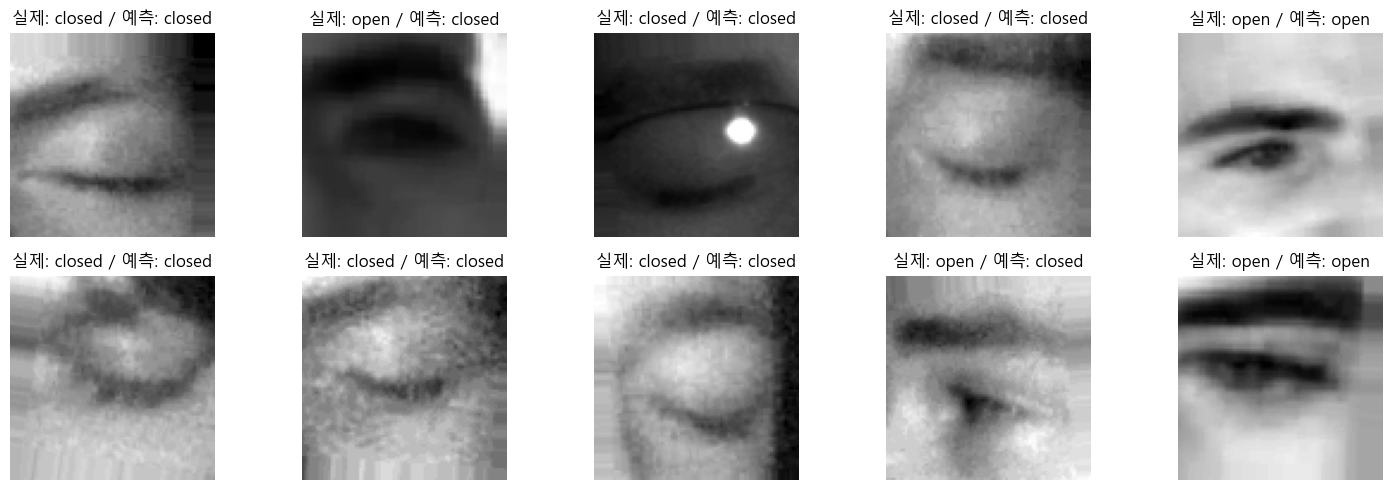

In [13]:
class_names=list(val_generator.class_indices.keys())  # closed, open
indices=random.sample(range(len(y_true)), 10)  # 전체 val 데이터 중 10개 무작위 인덱스 선택

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):  # 10개 인덱스에 대해 하나씩 처리
    batch_idx=idx // BATCH_SIZE  # 인덱스가 몇 번째 배치에 속해 있는지 계산
    offset=idx % BATCH_SIZE  # 해당 배치 내에서의 위치 계산

    val_generator.reset()  # generator 처음부터 리셋해서 배치 인덱스까지 이동
    for _ in range(batch_idx+1):  # 항상 같은 순서로 시작하기 위해 초기화
        images, _=next(val_generator)  # 원하는 배치까지 이동

    img=images[offset].squeeze()  # 해당 배치에서 원하는 이미지 하나 꺼내기(squeeze: 86, 86, 1 -> 86, 86)
    true_label=class_names[int(y_true[idx])]  # real
    pred_label=class_names[int(y_pred[idx])]  # pred

    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(f"실제: {true_label} / 예측: {pred_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()

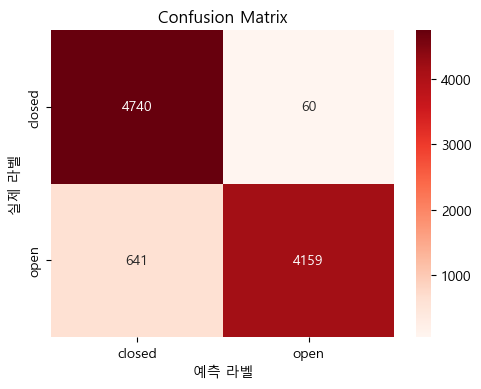

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 혼동 행렬
cm=confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("예측 라벨")
plt.ylabel("실제 라벨")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("../../results/images/confusion_matrix.png")
plt.show()

In [19]:
model_path="../../src/models/02_Basic_Model/final_model_from_tuner.keras"
model.save(model_path)
print(f"최종 모델 저장 완료: {model_path}")

최종 모델 저장 완료: ../../src/models/02_Basic_Model/final_model_from_tuner.keras


In [21]:
print("최종 Validation Accuracy:", history.history["val_accuracy"][-1])
print("모델 저장 완료 및 리포트 저장 완료")

최종 Validation Accuracy: 0.9083333611488342
모델 저장 완료 및 리포트 저장 완료
